<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/Lujsin_of_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# === Cell 1: Setup & Load with auto-check ===
import os
import pandas as pd

repo_url = "https://github.com/lujainAziz/LujainAlmajyul-it326.git"
repo_name = "LujainAlmajyul-it326"
dataset_path = f"{repo_name}/Dataset/Raw_dataset.csv"

if os.path.exists("Dataset/Raw_dataset.csv"):
    print(" Found Dataset/Raw_dataset.csv")
    df = pd.read_csv("Dataset/Raw_dataset.csv")

elif os.path.exists(dataset_path):
    print(" Found inside cloned repo")
    df = pd.read_csv(dataset_path)

else:
    print(" Cloning repository from GitHub...")
    !git clone {repo_url}
    if os.path.exists(dataset_path):
        df = pd.read_csv(dataset_path)
    else:
        raise FileNotFoundError("file not found neither locally nor in github")



 Cloning repository from GitHub...
Cloning into 'LujainAlmajyul-it326'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 132 (delta 56), reused 9 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 774.34 KiB | 2.19 MiB/s, done.
Resolving deltas: 100% (56/56), done.


#####the code check that there is no problem while reading the file

--------------------------------------------------------------------------------
## missing value , five Number summary

In [4]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

# === Complete Statistical Summary (count, mean, std, min, quartiles, max) ===
import pandas as pd
import numpy as np

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# One single table that includes everything
stat_summary = df[num_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
print("📊 Complete Statistical Summary:")
print(stat_summary)

Missing values per column:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
📊 Complete Statistical Summary:
                    count         mean         std          min          25%  \
StudentID          2392.0  2196.500000  690.655244  1001.000000  1598.750000   
Age                2392.0    16.468645    1.123798    15.000000    15.000000   
Gender             2392.0     0.510870    0.499986     0.000000     0.000000   
Ethnicity          2392.0     0.877508    1.028476     0.000000     0.000000   
ParentalEducation  2392.0     1.746237    1.000411     0.000000     1.000000   
StudyTimeWeekly    2392.0     9.771992    5.652774     0.001057     5.043079   
Absences           239

### Missing values & Five-number summary
- Description: The missing values table shows that there are no missing values in the dataset (all counts are zero).  
- Insight: Since the dataset is complete, no imputation is required. This means that preprocessing can focus on scaling, discretization, and handling outliers rather than filling missing data.  
- Five-number summary: The summary shows min, Q1, median, Q3, and max for each numeric column. For example, StudyTimeWeekly ranges from 0.01 to ~19.9, Absences from 0 to 29, and GPA from 0 to 4.  
- Decision: The attributes have very different ranges (e.g., Absences up to 29, GPA only up to 4). This confirms the need for normalization so that attributes are on comparable scales before modeling.

--------------------------------------------------------------------------------
## histogram

NameError: name 'plt' is not defined

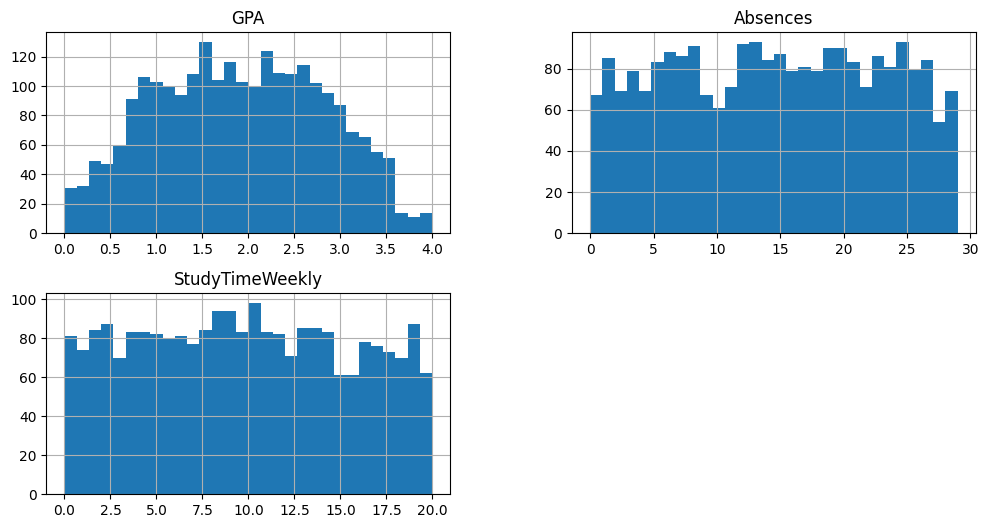

In [5]:
df[['GPA','Absences','StudyTimeWeekly']].hist(bins=30, figsize=(12,6))
plt.suptitle("Histograms of GPA, Absences, StudyTimeWeekly")
plt.show()

### Histograms (GPA, Absences, StudyTimeWeekly)

- Description: The histograms show the frequency distribution of three numeric attributes: GPA, Absences, and StudyTimeWeekly.  
- Insight:  
  - GPA: The values are spread between 0 and 4, with more students concentrated between 1.0 and 3.0, indicating the distribution is not uniform.  
  - Absences: The distribution is fairly spread but includes some higher values close to 30, suggesting potential extreme cases.  
  - StudyTimeWeekly: Values are distributed across the range (0–20) with slight variations, showing differences in study habits.  
- Decision: The differences in scale and the spread of values justify applying normalization (to make attributes comparable). Absences may also need outlier treatment to handle the extreme values at the upper end.

--------------------------------------------------------------------------------
## box plot & outliers

In [ ]:
def iqr_bounds(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

for c in ['GPA','Absences','StudyTimeWeekly']:
    plt.figure()
    plt.boxplot(df[c])
    plt.title(f"Boxplot of {c}")
    plt.show()

    lo, hi = iqr_bounds(df[c])
    outliers = ((df[c] < lo) | (df[c] > hi)).sum()
    print(f"{c}: Outliers={outliers}")

### Boxplots & Outliers
- Description: The boxplots show the spread of GPA, Absences, and StudyTimeWeekly. The median and quartiles are clearly visible for each attribute.  
- Insight: No significant outliers were detected in these three attributes, as all values fall within the whiskers.  
- Decision: Since there are no heavy outliers, we do not need strong outlier removal. However, the attributes still have different ranges (e.g., Absences up to 29 vs. GPA up to 4), so normalization is required during preprocessing.

--------------------------------------------------------------------------------
## bar plot

In [ ]:
counts = df['GradeClass'].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Class Label Distribution (GradeClass)")
plt.xlabel("GradeClass")
plt.ylabel("Count")
plt.show()


### Bar plot (Class Label Distribution)
- Description: The bar plot shows the distribution of students across grade classes (0–4).  
- Insight: The dataset is highly imbalanced. Most students fall into GradeClass 4.0, while very few students are in GradeClass 0.0. Intermediate classes (1.0–3.0) have moderate counts.  
- Decision: The imbalance may affect classification results, as models could be biased towards the majority class. This indicates that resampling techniques or careful evaluation metrics may be required during preprocessing and modeling.

--------------------------------------------------------------------------------
## sactter plot

In [ ]:
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.title("Scatter: StudyTimeWeekly vs GPA")
plt.xlabel("Study Time Weekly")
plt.ylabel("GPA")
plt.show()

### Scatter Plot (StudyTimeWeekly vs GPA)
- Description: The scatter plot displays the relationship between weekly study time and GPA. Each point represents one student.  
- Insight: The plot shows a weak positive trend: students with higher study time generally tend to achieve a higher GPA, although the relationship is not perfectly linear.  
- Decision: This confirms that StudyTimeWeekly is a relevant predictor for GPA. It should be included in modeling but may require normalization so that it is comparable with other numeric attributes.
